# Hyperparameter Tuning

# GridSearchCV

In [13]:
# -----------------------------------------------------------------
# Compare multiple Classifiers and tune the hyperparameters 
# using GridSearchCV
# -----------------------------------------------------------------

# Import libraries
import pandas as pd

# Read dataset
data = pd.read_csv('hpt_small.csv')

# Create Dummy variables
data_prep = pd.get_dummies(data, drop_first=True)

# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

# Import and create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

# Import and create Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=1234)

# Import and create Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=1234)


# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameters for Random Forest
rfc_param = {'n_estimators':[10,15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5]
            }

# The parameters results in 3 x 2 x 5 = 30 different combinations
# CV=10 for 30 different combinations mean 300 jobs/model runs

rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

# Fit the data to do Grid Search
rfc_grid_fit = rfc_grid.fit(X, Y)

# Get the results of the GridSearchCV
cv_results_rfc = pd.DataFrame.from_dict(rfc_grid_fit.cv_results_)



# Define parameters for Logistic Regression
lrc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'penalty':['l2'],
            'solver':['liblinear','lbfgs', 'saga']
            }

# The parameters results in 7 x 1 x 3 = 21 different combinations
# CV=10 for 21 different combinations mean 210 jobs/model runs

lrc_grid = GridSearchCV(estimator=lrc, 
                        param_grid=lrc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
                        verbose=True)

# Fit the data to do Grid Search using Logistic Regression
lrc_grid_fit = lrc_grid.fit(X, Y)

# Get the Grid Search results for Logistic Regression
cv_results_lrc = pd.DataFrame.from_dict(lrc_grid_fit.cv_results_)


# define parameters for Support Vector Classifier
svc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'kernel':['rbf', 'linear'],
            'gamma':[0.1, 0.25, 0.5, 1, 5]
            }

# The parameters results in 7 x 2 x 5 = 70 different combinations
# CV=10 for 70 different combinations mean 700 jobs/model runs

svc_grid = GridSearchCV(estimator=svc, 
                        param_grid=svc_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

# Fit the data to do Grid Search for Support Vector
svc_grid_fit = svc_grid.fit(X, Y)

# Get the Grid Search results for Support Vector
cv_results_svc = pd.DataFrame.from_dict(svc_grid_fit.cv_results_)

# Get the top ranked test score for all the three classifiers
rfc_top_rank = cv_results_rfc[cv_results_rfc['rank_test_score'] == 1]
lrc_top_rank = cv_results_lrc[cv_results_lrc['rank_test_score'] == 1]
svc_top_rank = cv_results_svc[cv_results_svc['rank_test_score'] == 1]


# Print the train and test score of the Random Forest Classifier

print('\n\n')
print('Random Forest Classifier')
print(rfc_top_rank['mean_test_score'])
print(rfc_top_rank['mean_train_score'])

# Print the best parameters of the Random Forest Classifier
print('\n The best Parameters are : ')
print(rfc_grid_fit.best_params_)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.3s finished





Random Forest Classifier
20    0.816
Name: mean_test_score, dtype: float64
20    0.856444
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 20}


# RandomizedSearchCV 

In [2]:
# -----------------------------------------------------------------
# Perform RandomizedSearchCV for hyperparameter tuning
# -----------------------------------------------------------------

# Import libraries
import pandas as pd

# Read dataset
data = pd.read_csv('hpt_small.csv')

# Create Dummy variables
data_prep = pd.get_dummies(data, drop_first=True)

# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

# Import and create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# define parameters for Random Forest
rfc_param = {'n_estimators':[10,15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5]
            }

# The parameters results in 3 x 2 x 5 = 30 different combinations

# Create the RandomizedSearchCV object
rfc_rs = RandomizedSearchCV(estimator=rfc, 
                        param_distributions=rfc_param,
                        scoring='accuracy',
                        cv=10,
                        n_iter=10,
                        return_train_score=True,
                        random_state=1234)

# n_iter selects 10 combinations out of 30 possible
# Now 10 x 10 = 100 jobs will be executed

# Fit the data to RandomizedSearchCV object
rfc_rs_fit = rfc_rs.fit(X, Y)

# Get the results of RandomizedSearch
cv_results_rfc_rs = pd.DataFrame.from_dict(rfc_rs_fit.cv_results_)

# Print the best parameters of Randomized Search for Random Forest
print('\n The best Parameters are : ')
print(rfc_rs_fit.best_params_)


 The best Parameters are : 
{'n_estimators': 15, 'min_samples_split': 16, 'min_samples_leaf': 5}


# Implementation of Bayesian Optimization

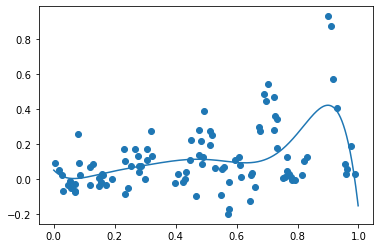

>x=0.898, f()=0.420798, actual=0.850
>x=0.903, f()=0.478168, actual=0.683
>x=0.902, f()=0.502637, actual=0.912
>x=0.907, f()=0.543976, actual=0.693
>x=0.901, f()=0.560210, actual=0.702
>x=0.911, f()=0.567111, actual=0.632
>x=0.894, f()=0.575531, actual=0.727
>x=0.902, f()=0.588883, actual=0.857
>x=0.901, f()=0.607557, actual=0.765
>x=0.903, f()=0.617588, actual=0.802
>x=0.901, f()=0.629050, actual=0.665
>x=0.903, f()=0.631001, actual=1.001
>x=0.901, f()=0.651257, actual=0.754
>x=0.885, f()=0.641677, actual=0.624
>x=0.905, f()=0.654935, actual=0.830
>x=0.907, f()=0.661752, actual=0.774
>x=0.907, f()=0.666930, actual=0.775
>x=0.915, f()=0.660602, actual=0.645
>x=0.902, f()=0.672863, actual=0.852
>x=0.903, f()=0.679811, actual=0.819
>x=0.900, f()=0.685198, actual=0.795
>x=0.903, f()=0.689178, actual=0.866
>x=0.897, f()=0.694189, actual=0.616
>x=0.891, f()=0.686272, actual=0.761
>x=0.897, f()=0.694078, actual=0.968
>x=0.901, f()=0.704022, actual=0.771
>x=0.895, f()=0.703764, actual=0.783
>

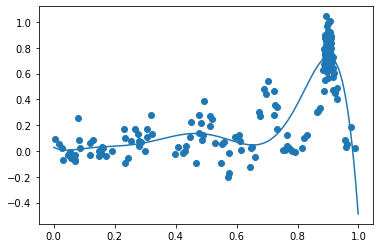

Best Result: x=0.894, y=1.044


In [6]:
# example of bayesian optimization for a 1d function from scratch
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    mu = mu[:, 0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = argmax(scores)
    return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()

# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(100):
    # select the next point to sample
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    # add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, [[actual]]))
    # update the model
    model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

# BayesSearchCV

pip install scikit-optimize

In [5]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_iris(True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75,
                                                    random_state=0)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': Real(1e-6, 1e+6, prior='log-uniform'),
        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'degree': Integer(1,8),
        'kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    n_iter=32,
    random_state=0
)

# executes bayesian optimization
_ = opt.fit(X_train, y_train)

# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))


0.9736842105263158
